# Computational Methods in Economics

## Lecture 6b - Multivariate Function Approximation

In [35]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-01-05 15:24:23.344596


### Preliminaries

#### Import Modules

In [5]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa
import statsmodels.api as sm

# import sys
from importlib import reload

## This Lecture

- [Introduction](#introduction)
- [Multivariate Function Approximation](#funapprox2)
- [Other Topics](#misc)

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'introduction'></a>

## Introduction




--------------------------------------------------------------------------------------------------------------------------------
<a id = 'funapprox2'></a>

## Multivariate Function Approximation in Python

Recall that the general interpolation problem that we want to solve is

\begin{equation}
   f(\mathbf{x}) \approx \hat{f}(\mathbf{x}) 
\end{equation}

for $\mathbf{x} \in [b,c] \subset \mathbb{R}^d$, with an equality at a finite number of grid points:

\begin{equation}
   f(\mathbf{x}_i) = \hat{f}(\mathbf{x}_i) 
\end{equation}

where $f$ is defined on the *d-dimensional* interval 

\begin{equation}
    I = \{ (x_1, x_2, ..., x_d)\ |\ b_k \le x_k \le c_k, k = 1, ..., d \}
\end{equation}

As in the case of approximating a univariate function, we need basis functions to approximate $f$. We will consider two alternative approaches, tensor product and complete polynomials.

#### Tensor Product Basis

If the function $f$ has $d \ge 2$ arguments, we can approximate it by using *a tensor product* of univariate basis functions. 

For example, consider a function with two variables, $f( x_1, x_2 )$, and hence  $d = 2$. Let

\begin{equation}
   \left\{ B_{j_1}(x_1) \right\}_{j_1 = 0}^{n_1}
\end{equation}

denote a sequence of univariate basis functions, e.g. monomials or Chebyshev polynomials, of the variable $x_1$. Similarly, we have

\begin{equation}
   \left\{ B_{j_2}(x_2) \right\}_{j_2 = 0}^{n_2}
\end{equation}

The tensor product of these basis functions is then given 

\begin{equation}
   \left\{ B_{j_1}(x_1) B_{j_2}(x_2)\ \big|\ j_1 = 0, ..., n_1; j_2 = 0, ..., n_2 \right\}
\end{equation}

In line with the univariate case, we approximate $f$ with a linear combinations of the elements of this tensor product:

\begin{equation}
   f( x_1, x_2 ) \approx \sum_{j_1 = 0}^{n_1} \sum_{j_2 = 0}^{n_2} a_{j_1, j_2} B_{j_1}(x_1) B_{j_2}(x_2)
\end{equation}

In other words, for degrees of approximation given by $n_1$ and $n_2$, the approximant consists of a sum of $(n_1 + 1)$ times $(n_2 + 1)$ elements, and we have to find $(n_1 + 1) \cdot (n_2 + 1)$ basis coefficients. Often, we have $n_1 = n_2 = n$, which implies determining $(n + 1)^2$ coefficients. If $B_{j_1}$ and $B_{j_2}$ are polynomials, we call this the $n$th order *tensor product polynomial*.

As in the univariate case, we will usually use Chebyshev basis functions $T_j$. Let $z_1, z_2$ be the function values $x_1, x_2$ on the interval [-1,1]. Then the example above becomes

\begin{equation}
   f( x_1, x_2  ) \approx \sum_{j_1 = 0}^{n} \sum_{j_2 = 0}^{n} a_{j_1 j_2} \mathcal{T}_{j_1 j_2} (z_1, z_2)
\end{equation}

To save on notation, we have defined 
\begin{equation}
   \mathcal{T}_{j_1 j_2} (z_1, z_2) \equiv T_{j_1}(z_1) T_{j_2}(z_2)
\end{equation}

What does this imply for the Chebyshev matrix? Recall that in the univariate case, we had


\begin{equation}
\Phi_c =
\left[
\begin{array}{cccc}
    T_0(z_1) & T_1(z_1) & \cdots & T_n(z_1)  \\
    \vdots & \vdots  & \vdots \\
    T_0(z_m) & T_1(z_m) & \cdots & T_n(z_m) &
\end{array}
\right]
\end{equation}


This is an $m$-by-$n+1$ matrix. In the two-dimensional case, a single row of the Chebyshev matrix - i.e. for a given combination of univariate grid points $(z_{1i}, z_{2i})$ - looks like the following:
\begin{equation}
    [\mathcal{T}_{0 0} (z_{1i}, z_{2i})\ \mathcal{T}_{1 0} (z_{1i}, z_{2i})\ \mathcal{T}_{0 1} (z_{1i}, z_{2i})\ \mathcal{T}_{1 1} (z_{1i}, z_{2i})\ ...\ \mathcal{T}_{n n} (z_{1i}, z_{2i})]
\end{equation}

Hence, each row of a two-dimensional Chebyshev matrix has $(n+1)^2$ - or more generally, $(n_1 + 1) \cdot (n_2 + 1)$ - elements.

#### Multidimensional Grid

As in the univariate case, each row of the Chebyshev matrix corresponds to one grid point. In the multivariate case, a grid point is a combination of elements from the univariate interpolation grids. 

That is, let $z_{11}, z_{12}, ..., z_{1 m_1}$ denote $m_1$ Chebyshev nodes corresponding to the first argument of function $f$ and let $z_{21}, z_{22}, ..., z_{2m_2}$ denote $m_2$ Chebyshev nodes corresponding to the second argument. Then, a grid point is given by $(z_{1 i_1}, z_{2 i_2})$.

The set of all $m_1 \cdot m_2$ grid points is the *Cartesian product* of the univariate interpolation nodes:

\begin{equation}
    \{ (z_{1 i_1}, z_{2 i_2})\ \big|\ i_k = 1, ..., m_k,\ k = 1,2 \}
\end{equation}

Often, we set $m_1 = m_2$, and hence we use $m^2$ grid points.

#### The Chebyshev Matrix

Hence, the full Chebyshev matrix in the two-dimensional case reads


\begin{equation}
\Phi_c =
\left[
\begin{array}{cccccc}
   \mathcal{T}_{0 0} (z_{11}, z_{21}) & \mathcal{T}_{1 0} (z_{11}, z_{21}) & \mathcal{T}_{0 1} (z_{11}, z_{21}) & \mathcal{T}_{1 1} (z_{11}, z_{21}) & ... & \mathcal{T}_{n n} (z_{11}, z_{21})  \\
   \mathcal{T}_{0 0} (z_{12}, z_{21}) & \mathcal{T}_{1 0} (z_{12}, z_{21}) & \mathcal{T}_{0 1} (z_{12}, z_{21}) & \mathcal{T}_{1 1} (z_{12}, z_{21}) & ... & \mathcal{T}_{n n} (z_{12}, z_{21})  \\
    \vdots & \vdots  & \vdots & \vdots & \vdots  & \vdots \\
    \mathcal{T}_{0 0} (z_{1m}, z_{2m}) & \mathcal{T}_{1 0} (z_{1m}, z_{2m}) & \mathcal{T}_{0 1} (z_{1m}, z_{2m}) & \mathcal{T}_{1 1} (z_{1m}, z_{2m}) & ... & \mathcal{T}_{n n} (z_{1m}, z_{2m})
\end{array}
\right]
\end{equation}

This matrix has as many rows as grid points ($m^2$ or more generally $m_1 \cdot m_2$) and as many columns as possible combinations of Chebyshev basis functions ($(n+1)^2$ or more generally $(n_1 + 1) \cdot (n_2 + 1)$). Hence, in the simplest case, this is a $m^2$-by-$(n+1)^2$ matrix.

Numpy's **polynomial.chebyshev** package has a function **chebvander2d** that evaluates a two-dimensional tensor product of Chebyshev basis functions, either at a single point - in the example below at (0.5, 0.5) - or an array of points.

In [5]:
print(np.polynomial.chebyshev.chebvander2d(0.5, 0.5, [2,2]))

[[ 1.    0.5  -0.5   0.5   0.25 -0.25 -0.5  -0.25  0.25]]


In [202]:
fa.chebnodes(3)

array([ -8.66025404e-01,  -6.12323400e-17,   8.66025404e-01])

In [201]:
print(np.polynomial.chebyshev.chebvander2d(fa.chebnodes(3), fa.chebnodes(3), [2,2]))

[[  1.00000000e+00  -8.66025404e-01   5.00000000e-01  -8.66025404e-01
    7.50000000e-01  -4.33012702e-01   5.00000000e-01  -4.33012702e-01
    2.50000000e-01]
 [  1.00000000e+00  -6.12323400e-17  -1.00000000e+00  -6.12323400e-17
    3.74939946e-33   6.12323400e-17  -1.00000000e+00   6.12323400e-17
    1.00000000e+00]
 [  1.00000000e+00   8.66025404e-01   5.00000000e-01   8.66025404e-01
    7.50000000e-01   4.33012702e-01   5.00000000e-01   4.33012702e-01
    2.50000000e-01]]


For interpolation, in order to find the $(n+1)^2$ basis coefficients $a_{j_1 j_2}$, we need $m = n + 1$ Chebyshev nodes in every dimension, and hence $\Phi_c$ is a square matrix. 

\begin{equation}
y = \Phi_c a =
\left[
\begin{array}{cccccc}
   \mathcal{T}_{0 0} (z_{11}, z_{21}) & \mathcal{T}_{1 0} (z_{11}, z_{21}) & \mathcal{T}_{0 1} (z_{11}, z_{21}) & \mathcal{T}_{1 1} (z_{11}, z_{21}) & ... & \mathcal{T}_{n n} (z_{11}, z_{21})  \\
   \mathcal{T}_{0 0} (z_{12}, z_{21}) & \mathcal{T}_{1 0} (z_{12}, z_{21}) & \mathcal{T}_{0 1} (z_{12}, z_{21}) & \mathcal{T}_{1 1} (z_{12}, z_{21}) & ... & \mathcal{T}_{n n} (z_{12}, z_{21})  \\
    \vdots & \vdots  & \vdots & \vdots & \vdots  & \vdots \\
    \mathcal{T}_{0 0} (z_{1m}, z_{2m}) & \mathcal{T}_{1 0} (z_{1m}, z_{2m}) & \mathcal{T}_{0 1} (z_{1m}, z_{2m}) & \mathcal{T}_{1 1} (z_{1m}, z_{2m}) & ... & \mathcal{T}_{n n} (z_{1m}, z_{2m})
\end{array}
\right]
\left[
\begin{array}{c}
a_{00} \\
a_{10} \\
a_{01} \\
a_{11} \\
\vdots \\
a_{nn}
\end{array}
\right]
\end{equation}



In this course, we will restrict ourselves to approximating functions with at most two arguments. The two-dimensional case outlined above generalizes in a straightforward way to $d > 2$. In this case, the *d-dimensional* tensor product basis is given by:

\begin{equation}
   \left\{ \prod_{k = 1}^{d} B_{j_k}(x_k)\ \big|\ j_k = 0, ..., n_k; k = 1, ..., d \right\}
\end{equation}

Hence, we approximate a $d$-variate $f$ with:

\begin{equation}
   f( \mathbf{x} ) \approx \sum_{j_1 = 0}^{n} ... \sum_{j_d = 0}^{n} a_{j_1j_2...j_d}   \mathcal{B}_{j_1j_2...j_d}  (\mathbf{x})
\end{equation}

with 

\begin{equation}
   \mathcal{B}_{j_1j_2...j_d}  (\mathbf{x}) \equiv \prod_{k = 1}^d B_{j_k}(x_k)
\end{equation}

#### Complete Polynomials

The obvious problem with tensor product polynomial bases is that the number of elements grow exponentially as the dimension increases. If we have an approximation degree of $n$ in every dimensions, we get $(n+1)^2$ basis functions for a two-variate function, $(n+1)^3$ for three variables and so on. In general, with $d$ dimensions, we have $(n + 1)^d$ basis functions. 

An alternative are *complete set of polynomials* (or *complete polynomials* for short). For illustration, consider a monomial basis for every dimension, i.e. $x_k^0, x_k^1, ..., x_k^n$ for $k = 1, ... , d$ and set $d = 2$. Then, the tensor product of these basis functions would read:

\begin{equation}
   \left\{ x_1^{j_1} x_1^{j_2}\ \big|\ j_1 = 0, ..., n; j_2 = 0, ..., n \right\} = \left\{1, x_1, x_2, x_1 x_2, x_1^{2}, x_2^{2}, x_1^{2} x_2, x_1^{2} x_2^2, x_1 x_2^2, ..., x_1^n x_2^n \right\}
\end{equation}

In contrast, the complete set of polynomials of *total degree $l$* includes only terms for which the sum of the powers is at most $l$; that is $j_1 + j_2 \le l$. 

In the example above, with $l = 3$, all terms up to $x_1^{2} x_2$ and $x_1^3$ are part of the basis; $x_1^{2} x_2^2$ is not in the basis, since the sum of the exponents is four. Hence, the two-dimensional complete monomials of total degree 3 are:

\begin{equation}
  \mathsf{B}_3 = \left\{ x_1^{j_1} x_1^{j_2}\ \big|\ \sum^2_{k = 1} j_k \le l \right\} = \left\{1, x_1, x_2, x_1 x_2, x_1^{2}, x_2^{2}, x_1^{2} x_2, x_1 x_2^2, x_1^3, x_2^3 \right\}
\end{equation}


The set of complete polynomials grows *polynomially* in $d$ (for a fixed $l$). For example, with $d = 2$ and $n = 3$, the tensor product basis consist of $(3 + 1)^2 = 16$ elements. With $d = 3$, it would have $(3 + 1)^3 = 64$ elements and so on.

In contrast, the set of complete polynomials with $l = 3$ would have 10 elements for $d = 2$ (see above) and 20 elements for $d = 3$ (verify this!). 

Why is it sufficient to use complete rather than tensor product polynomials? Without going into the details, the intuition is that many of the elements in a tensor product basis are "unnecessary" for getting a good approximation. Using complete polynomials can be considered a decent approximation to a tensor product basis, with far fewer elements and hence a (possibly considerably) lower computational cost. 

While the example above used monomial basis functions, the same idea can be applied to a Chebyshev basis - recall that any Chebyshev polynomial can be written as a monomial power series. For $d = 2$ and $l = 3$, the set of complete Chebyshev polynomials is given by:

\begin{equation}
  \mathsf{B}_3 = \left\{ T_{j_1}(x_1) T_{j_2}(x_2)\ \big|\ \sum^2_{k = 1} j_k \le l \right\} = \left\{T_{0}(x_1) T_{0}(x_2), T_{0}(x_1) T_{1}(x_2), T_{1}(x_1) T_{0}(x_2), T_{1}(x_1) T_{1}(x_2), T_{2}(x_1) T_{0}(x_2), T_{0}(x_1) T_{2}(x_2), T_{2}(x_1) T_{1}(x_2), T_{2}(x_1) T_{1}(x_2), T_{3}(x_1) T_{0}(x_2), T_{0}(x_1) T_{3}(x_2) \right\}
\end{equation}




It is important to note that even when we use a set of complete polynomials as basis functions, we still employ a Cartesian product of interpolation nodes as the grid. By definition, we will have less basis coefficients than grid points. Hence, an approximation algorithm using complete polynomials must rely on regression rather than interpolation for finding the coefficients.

To emphasize this point, consider again the example above with $d = 2$ and $l = 3$. 

--------------------------------------------------------------------------------------------------------------------------------

## Example: Cobb-Douglas production function

A prime example in economics of a multivariate function is a production function. Consider a Cobb-Douglas function, $f(x, y) = x^\alpha y^{1 - \alpha}$. Below, we plot it using Matplotlib's **contour** function. 

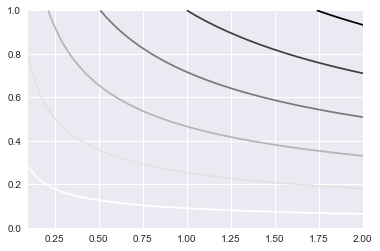

In [16]:
def cd_fun(x, y, alpha = 0.33):
    """
    Cobb-Douglas Function
    """
    return x**alpha * y**(1 - alpha)

N = 31
## min and max for approximation grid
g1_min, g1_max = 0.1, 2
g2_min, g2_max = 0.001, 1
## equidistant grid
x1 = np.linspace(g1_min, g1_max, N)
x2 = np.linspace(g2_min, g2_max, N)
## use meshgrid function 
X1, X2 = np.meshgrid(x1, x2)
Y = cd_fun(X1, X2)

## plot contour
fig, ax = plt.subplots()
ax.contour(X1, X2, Y)

### A Two-dimensional Chebyshev Approximation Algorithm

Analogous to the univariate case, we can state the following algorithm for approximating a function $f(x_1, x_2)$ for $x_1 \in [b_1, c_1]$ and $x_2 \in [b_2, c_2]$ using a polynomial of degree $n$ and $m \ge n + 1$ grid points in every dimension:

(i) Compute the $m \ge n + 1$ Chebyshev nodes on $[-1, 1]$: 

\begin{equation}
	z_i = \cos\left(- \frac{(2i - 1)\pi}{2m}\right), \quad i = 1, ..., m
\end{equation}

(ii) Adjust the nodes to the $[b_1, c_1]$ and $[b_2, c_2]$ intervals:

\begin{equation}
    x_{1i} = b_1 + \frac{(z_i + 1) (c_1 - b_1)}{2}, \quad\ i = 1,...,m
\end{equation}

\begin{equation}
    x_{2i} = b_2 + \frac{(z_i + 1) (c_2 - b_2)}{2}, \quad\ i = 1,...,m
\end{equation}

Step (i) and (ii) are combined in the Python function **chebgrid** that we have defined in the previous lecture. We can call it from the **fa** module (see above).

m = 10
x1_c = fa.chebgrid(g1_min, g1_max, m)
x2_c = fa.chebgrid(g2_min, g2_max, m)

print(x1_c)

(iii) Evaluate $f$ at the approximation nodes:

\begin{equation}
    y_{i_1, i_2} = f(x_{1i_1}, x_{2i_2}), \quad\ i_1 = 1,...,m, \ i_2 = 1,...,m
\end{equation}

In Python, we can use Numpy's **meshgrid** function to get the Cartesian product of the univariate Chebyshev nodes:

In [26]:
X2_c, X1_c = np.meshgrid(x2_c, x1_c)
print(X1_c)

Y_c = cd_fun(X1_c, X2_c) 

[[ 0.11169608  0.11169608  0.11169608  0.11169608  0.11169608  0.11169608
   0.11169608  0.11169608  0.11169608  0.11169608]
 [ 0.2035438   0.2035438   0.2035438   0.2035438   0.2035438   0.2035438
   0.2035438   0.2035438   0.2035438   0.2035438 ]
 [ 0.37824856  0.37824856  0.37824856  0.37824856  0.37824856  0.37824856
   0.37824856  0.37824856  0.37824856  0.37824856]
 [ 0.61870903  0.61870903  0.61870903  0.61870903  0.61870903  0.61870903
   0.61870903  0.61870903  0.61870903  0.61870903]
 [ 0.90138726  0.90138726  0.90138726  0.90138726  0.90138726  0.90138726
   0.90138726  0.90138726  0.90138726  0.90138726]
 [ 1.19861274  1.19861274  1.19861274  1.19861274  1.19861274  1.19861274
   1.19861274  1.19861274  1.19861274  1.19861274]
 [ 1.48129097  1.48129097  1.48129097  1.48129097  1.48129097  1.48129097
   1.48129097  1.48129097  1.48129097  1.48129097]
 [ 1.72175144  1.72175144  1.72175144  1.72175144  1.72175144  1.72175144
   1.72175144  1.72175144  1.72175144  1.72175144]
 

(iv) Compute the Chebyshev coefficients $a_i$, $ i = 0, ..., n $:
- when $m = n + 1$, solve the system of linear equations 

\begin{equation}
\begin{split}
\left[
\begin{array}{c}
    y_{1}  \\
    \vdots  \\
    y_{m}
\end{array}
\right] =
\left[
\begin{array}{cccc}
    T_0(z_1) & T_1(z_1) & \cdots & T_n(z_1)  \\
    \vdots & \vdots  & \vdots \\
    T_0(z_m) & T_1(z_m) & \cdots & T_n(z_m) &
\end{array}
\right]
\left[
\begin{array}{c}
    a_{0}  \\
    \vdots  \\
    a_{n}
\end{array}
\right] 
= \Phi
\left[
\begin{array}{c}
    a_{0}  \\
    \vdots  \\
    a_{n}
\end{array}
\right] 
\end{split}
\end{equation}

- when $m > n + 1$, solve the system of linear equations

\begin{equation}
     (\Phi^T \Phi) a = \Phi^T y  
\end{equation}

or, equivalently, compute 

\begin{equation}
    a_j = \frac{\sum_{i = 1}^m y_i T_j(z_i)}{\sum_{i = 1}^m  T_j(z_i)  T_j(z_i)} = {\begin{cases}\frac{\sum_{i = 1}^m y_i T_j(z_i)}{m} \quad \text{if}\ j=k=0\\  2\frac{\sum_{i = 1}^m y_i T_j(z_i)}{m}  \quad \text{if}\ j=k\neq 0\end{cases}}, \quad j = 0, ..., n
\end{equation}


*Key insight*: we do not a 2- or n-dimensional Chebyshev-Vandermonde matrix in order to implement the fitting step. Such a matrix is needed to approximate a function for a given coefficient vector. In the 2-D or 3-D case, functions for this are already implemented in the **polynomial.chebyshev** package.

In [30]:
## two dimensions
def chebfit_2d(Z, deg):
    """
    Computes the (deg[0]+1)-by-(deg[1]+1) coefficient matrix for interpolation with Chebyshev basis functions
    NB: Z must be a m1-by-m2 "meshgrid" matrix
    """
    ## get the dimensions of the grid
    m = Z.shape
    ## check of dimension are consistent
    assert len(m) == len(deg), "Inconsistent dimensions"

    ## define Chebyshev matrices    
    A, B = fa.chebmatrix(deg[0], m[0]), fa.chebmatrix(deg[1], m[1])
    
    ## Tensor interpolation in two dimensions
    coef = np.zeros(np.array(deg) + 1)
    for idx_A in range(deg[0] + 1):
        for idx_B in range(deg[1] + 1):    
            den = (A[:, idx_A].T @ A[:, idx_A]) * (B[:, idx_B].T @ B[:, idx_B])
            coef[idx_A, idx_B] = (A[:, idx_A].T @ Z) @ B[:, idx_B] / den
    
    return coef
         
# print(Z_c.shape)
coef = chebfit_2d(Y_c, [m-1, m-1])


NameError: name 'm' is not defined

(v) Find the approximant $\hat{f}(x_1, x_2)$, $x_1 \in [b_1, c_1]$, $x_2 \in [b_2, c_2]$, by evaluating

\begin{equation}
   \hat{f}( x_1, x_2  ) = \sum_{j_1 = 0}^{n} \sum_{j_2 = 0}^{n} a_{j_1 j_2} T_{j_1}\left( 2 \frac{x - b_1}{c_1 - b_1} - 1 \right) T_{j_2}\left( 2 \frac{x - b_2}{c_2 - b_2} - 1 \right)
\end{equation}

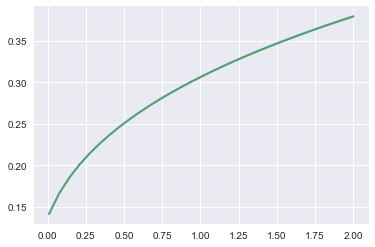

In [28]:
## approximate f along the first dimension 
y_app = np.zeros(N)
for idx in range(N):
    y_app[idx] = np.polynomial.chebyshev.chebval2d(fa.chebconvert(x1[idx], g1_min, g1_max), 
                                                   fa.chebconvert(x2[5], g2_min, g2_max), coef)


fig, ax = plt.subplots()
ax.plot(x, cd_fun(x1, x2[5]))
ax.plot(x, y_app)


Similar to the univariate case, the **chebval2d** function just implements the step of multiplying the basis functions with the basis coefficients:

In [33]:
np.polynomial.chebyshev.chebval2d(fa.chebconvert(1.1, g1_min, g1_max), fa.chebconvert(0.8, g2_min, g2_max), coef)

0.88841644279551457

In [34]:
Phi = np.polynomial.chebyshev.chebvander2d(fa.chebconvert(1.1, g1_min, g1_max), fa.chebconvert(0.8, g2_min, g2_max), [m-1, m-1]) 
Phi @ coef.flatten()

array([ 0.88841644])

--------------------------------------------------------------------------------------------------------------------------------

## Other Topics

In the interest of time, we will not talk in-depth about other topics in the context of function approximation, which are nevertheless highly relevant. 

#### Functional Equations

A slightly more complex example for function approximation than what we have seen so far is the case where we do not know $f$ explicitly, but where its values are determined *implicitly* by a functional equation.

For example, in the first example in lecture 1, we got a first-order condition that determined consumption of a good $c_1$ as a function of initial endowment $x$:

\begin{equation}
    [x - \tilde{c}_1(x)]^{\alpha\nu - \alpha + 1} - \alpha \tilde{c}_1(x)^\nu = 0. 
\end{equation}

This is an example of a functional equation $g(x, f(x)) = 0$ where the function $g$ is given, while $f$ is unknown. Note that the solution to a functional equation is not just a scalar or vector (as in all the problems considered so far), but a function which is defined at infinitely many points. Functional equation typically lack explicit closed-form solutions, and hence we look for approximate solutions $\hat{f}$. 

#### Hermite Interpolation



#### 